In [1]:
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
transform_train = transforms.Compose([
    transforms.RandomCrop(96, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [3]:
trainset = torchvision.datasets.STL10(
    root='./data', download=True, transform=transform_train)

Files already downloaded and verified


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
testset = torchvision.datasets.STL10(
    root='./data', download=True, transform=transform_test,split='test')

Files already downloaded and verified


In [6]:
testset.__len__()

8000

plt.imshow(plt.imread('data/stl10_binary/test_imgs/img_000031.jpg'))

In [7]:
everything = np.fromfile('data/stl10_binary/test_X.bin', dtype=np.uint8)
images = np.reshape(everything, (-1, 3, 96, 96))
images = np.transpose(images, (0, 3, 2 , 1))

In [8]:
images.shape

(8000, 96, 96, 3)

In [9]:
!mkdir test_imgs

import cv2
for i in range(images.shape[0]):
    im = images[i]
    cv2.imwrite('test_imgs//img_'+str(i).zfill(6)+'.jpg',cv2.cvtColor(im,cv2.COLOR_RGB2BGR))

In [9]:
import os
test_size = []
import glob
test_files = glob.glob('data/stl10_imgs//test_imgs/*.jpg')
test_files.sort()
for f in test_files:
    test_size.append(os.path.getsize(f))
print(np.mean(test_size),np.std(test_size))
train_size = []
train_files = glob.glob('data/stl10_imgs/train_imgs/*.jpg')
train_files.sort()
for f in train_files:
    train_size.append(os.path.getsize(f))

5839.517 1117.7333822119656


In [12]:
!rm -rf test_imgs/

(array([  46.,  185.,  559., 1088., 1749., 1958., 1528.,  689.,  174.,
          24.]),
 array([2178. , 2892.9, 3607.8, 4322.7, 5037.6, 5752.5, 6467.4, 7182.3,
        7897.2, 8612.1, 9327. ]),
 <BarContainer object of 10 artists>)

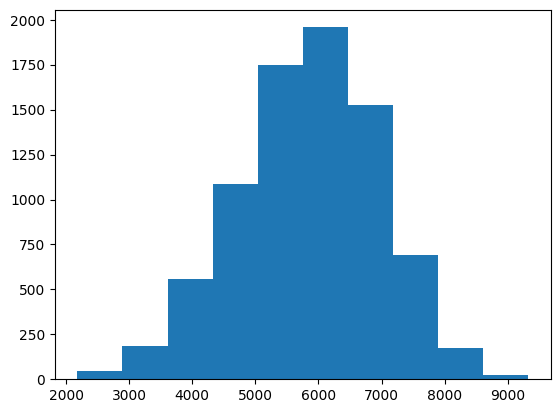

In [10]:
plt.hist(test_size)

In [11]:
np.unique(testset.labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([800, 800, 800, 800, 800, 800, 800, 800, 800, 800]))

In [12]:
np.unique(trainset.labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))

In [13]:
np.argsort(train_size)[:2500]

array([  31,  975, 2839, ..., 2283, 1007, 2748])

In [14]:
np.sort(train_size)

array([2274, 2327, 2351, ..., 9104, 9144, 9361])

In [15]:
lo_unb_index = np.argsort(train_size)[:2500]
lo_labels = trainset.labels[lo_unb_index]
hi_unb_index = np.argsort(train_size)[2500:]
hi_labels = trainset.labels[hi_unb_index]
random_index = np.random.permutation(5000)[:2500]
random_labels = trainset.labels[random_index]

In [16]:
np.unique(lo_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([430, 289, 267, 202, 134, 214, 112, 177, 407, 268]))

In [17]:
np.mean(np.unique(lo_labels,return_counts=True)[1])

250.0

In [18]:
np.unique(hi_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 70, 211, 233, 298, 366, 286, 388, 323,  93, 232]))

In [19]:
np.unique(random_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([250, 248, 243, 238, 246, 270, 259, 230, 263, 253]))

In [24]:
#lo_b_labels = []
lo_index = []
hi_index = []
for l in range(10):
    i = np.where(trainset.labels==l)
    sz = np.asarray(train_size)[i]
    j = np.argsort(sz)[:250]
    #j = np.argsort(sz)[125:375]
    lo_index.extend(i[0][j])
    j = np.argsort(sz)[250:]
    hi_index.extend(i[0][j])
bal_index = lo_index+hi_index
bal_index = np.asarray(bal_index)[np.random.permutation(len(bal_index))]

In [25]:
np.sort(train_size)

array([2274, 2327, 2351, ..., 9104, 9144, 9361])

In [26]:
np.unique(trainset.labels[bal_index],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))

In [27]:
index = np.arange(5000)
bbal_index = np.setdiff1d(index,bal_index)
np.unique(trainset.labels[bbal_index],return_counts=True)

(array([], dtype=uint8), array([], dtype=int64))

In [28]:
np.unique(trainset.labels[lo_index],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([250, 250, 250, 250, 250, 250, 250, 250, 250, 250]))

In [29]:
np.unique(trainset.labels[hi_index],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([250, 250, 250, 250, 250, 250, 250, 250, 250, 250]))

In [30]:
everything = np.fromfile('data/stl10_binary/train_X.bin', dtype=np.uint8)
images = np.reshape(everything, (-1, 3, 96, 96)) #
#images = np.transpose(images, (0, 3, 2 , 1))

In [31]:
images.shape

(5000, 3, 96, 96)

In [32]:
imgs = images[hi_index,:,:,:]
j = np.random.choice(range(len(hi_index)))

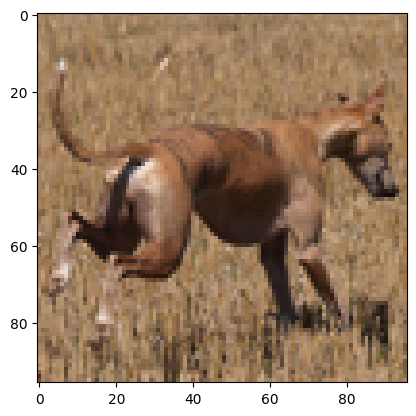

In [38]:
plt.imshow(np.transpose(imgs[j,:,:,:],(2,1,0)))

In [39]:
index= bbal_index
imgs = images[index,:,:,:]
labels = trainset.labels[index]

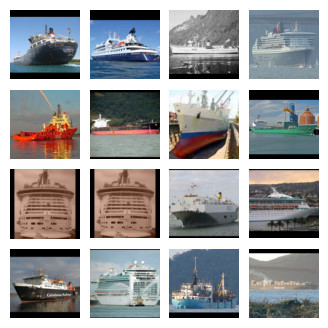

In [40]:
from mpl_toolkits.axes_grid1 import ImageGrid
ind = np.random.choice(np.where(labels==8)[0],16)
fig = plt.figure(figsize=(4., 4.))

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


for ax, im in zip(grid, imgs[ind,:,:,]):
    # Iterating over the grid returns the Axes.
    ax.imshow(np.transpose(im,(2,1,0)))
    ax.axis('off')
plt.show()

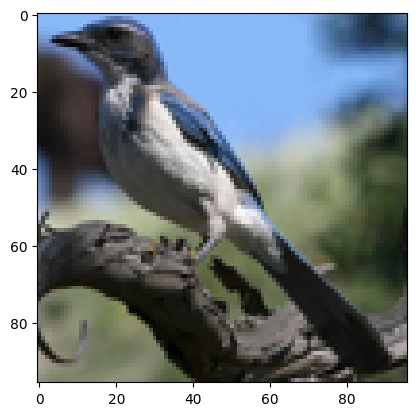

In [41]:
plt.imshow(np.transpose(imgs[j,:,:,:],(2,1,0)))

In [42]:
len(hi_index)==len(random_index)

True

In [24]:
from torchvision import models
import torch.nn as nn
# load pretrain model and modify...
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
nn.Dropout(0.5),
nn.Linear(num_ftrs, 10)
)

/home/ubuntu/anaconda3/envs/latest_pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/anaconda3/envs/latest_pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [25]:
import torch
import torch.backends.cudnn as cudnn
device = torch.device("cuda")

In [26]:
model = torch.nn.DataParallel(model)
cudnn.benchmark = True

In [27]:
model.to(device)

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [28]:
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
criterion = nn.CrossEntropyLoss()
def test():
    model.eval()
    test_loss = 0
    correct = 0
    out = []
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            _, predictions = torch.max(output, 1)
            correct += (predictions == y).sum().item()
            test_loss = criterion(output, y)
            out.extend(predictions.cpu().numpy())
            
    test_loss /= len(test_loader.dataset)
    print("Average Loss: ", test_loss, "  Accuracy: ", correct, " / ",
    len(test_loader.dataset), "  ", int(correct / len(test_loader.dataset) * 100), "%")
    return out,correct / len(test_loader.dataset)

In [29]:
from torch.utils.data import DataLoader, Dataset
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

In [32]:
import glob
dirs = glob.glob('stl///*/')
dics = {}
for d in dirs:
    name = d.split('/')[1]
    if 'Ran' in name or 'Lo' in name or 'Hi' in name or 'HiPr' in name or 'LoPr' in name or 'Bal' in name:
        checkpoint = torch.load(d+'/checkpoint/ckpt.pth')
        model.load_state_dict(checkpoint['net'])
        print(name)
        pred,o = test()
        dics[name] = o

Lo_3500_5366.101_883.443
Average Loss:  tensor(0.0003, device='cuda:0')   Accuracy:  5245  /  8000    65 %
Hi_4500_6023.215_979.917
Average Loss:  tensor(0.0003, device='cuda:0')   Accuracy:  5494  /  8000    68 %
Lo_4500_5656.395_984.331
Average Loss:  tensor(0.0002, device='cuda:0')   Accuracy:  5504  /  8000    68 %
Ran_1500_5849.986_1113.333
Average Loss:  tensor(0.0004, device='cuda:0')   Accuracy:  4553  /  8000    56 %
Hi_2500_6600.625_774.039
Average Loss:  tensor(0.0003, device='cuda:0')   Accuracy:  4715  /  8000    58 %
Ran_3500_5851.953_1093.467
Average Loss:  tensor(0.0002, device='cuda:0')   Accuracy:  5365  /  8000    67 %
Lo_2500_5081.159_817.695
Average Loss:  tensor(0.0003, device='cuda:0')   Accuracy:  4771  /  8000    59 %
Bal_2500_5848.364_1394.947
Average Loss:  tensor(0.0003, device='cuda:0')   Accuracy:  5044  /  8000    63 %
Ran_500_5852.084_1131.359
Average Loss:  tensor(0.0005, device='cuda:0')   Accuracy:  3288  /  8000    41 %
Lo_500_4199.990_690.562
Averag

In [33]:
acc = []
ran = []
ran_n = []
lo = []
lo_n = []
hi = []
hi_n = []
bal = []
bal_n = []
hipr = []
hipr_n = []
lopr = []
lopr_n = []
for l in dics.keys():
        print(l)
        if 'Ran_' in l:
            ran.append(dics[l])
            ran_n.append(int(l.split('_')[1]))
        if 'Hi_' in l:
            hi.append(dics[l])
            hi_n.append(int(l.split('_')[1]))
        if 'Lo_' in l:
            lo.append(dics[l])
            lo_n.append(int(l.split('_')[1]))
        if 'Bal_' in l:
            bal.append(dics[l])
            bal_n.append(int(l.split('_')[1]))
        if 'HiPr' in l:
            hipr.append(dics[l])
            hipr_n.append(int(l.split('_')[1]))
        if 'LoPr' in l:
            lopr.append(dics[l])
            lopr_n.append(int(l.split('_')[1]))

Lo_3500_5366.101_883.443
Hi_4500_6023.215_979.917
Lo_4500_5656.395_984.331
Ran_1500_5849.986_1113.333
Hi_2500_6600.625_774.039
Ran_3500_5851.953_1093.467
Lo_2500_5081.159_817.695
Bal_2500_5848.364_1394.947
Ran_500_5852.084_1131.359
Lo_500_4199.990_690.562
Ran_2500_5827.175_1105.330
Ran_4500_5834.941_1098.828
Hi_1500_6948.737_680.074
Lo_1500_4747.883_761.507
Hi_500_7501.370_571.879
Hi_3500_6309.325_866.113


In [35]:
ran = np.asarray(ran)
ran_n = np.asarray(ran_n)
hi = np.asarray(hi)
hi_n = np.asarray(hi_n)
lo = np.asarray(lo)
lo_n = np.asarray(lo_n)
bal = np.asarray(bal)
bal_n = np.asarray(bal_n)

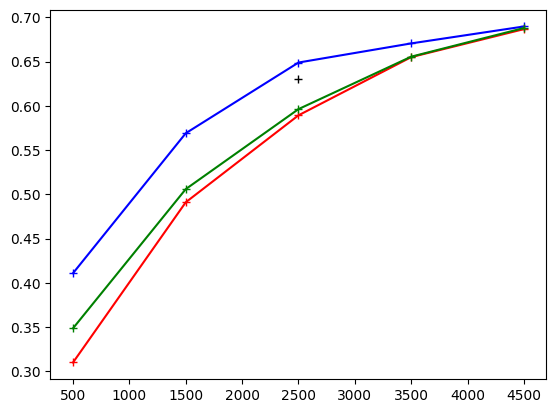

In [36]:
plt.plot(ran_n[np.argsort(ran_n)],ran[np.argsort(ran_n)],'b-+')
plt.plot(hi_n[np.argsort(hi_n)],hi[np.argsort(hi_n)],'r-+')
plt.plot(lo_n[np.argsort(lo_n)],lo[np.argsort(lo_n)],'g-+')
plt.plot(bal_n[np.argsort(bal_n)],bal[np.argsort(bal_n)],'k-+')

In [56]:
outputs= []
def hook2(module, input, output):
    #print(len(output))
    outputs.append(output)
#a = model.layer4[1].conv2.register_forward_hook(hook2)
b = model.avgpool.register_forward_hook(hook2)

In [57]:
outputs = []
test()

Average Loss:  tensor(0.0044, device='cuda:0')   Accuracy:  3  /  8000    0 %


[179,
 374,
 216,
 403,
 285,
 137,
 8,
 13,
 990,
 279,
 701,
 981,
 251,
 895,
 7,
 234,
 350,
 555,
 625,
 603,
 249,
 282,
 850,
 281,
 751,
 603,
 208,
 162,
 468,
 221,
 875,
 603,
 362,
 384,
 555,
 814,
 286,
 374,
 867,
 251,
 17,
 867,
 895,
 603,
 352,
 751,
 90,
 326,
 288,
 817,
 198,
 383,
 912,
 908,
 867,
 628,
 819,
 371,
 468,
 536,
 404,
 195,
 18,
 376,
 407,
 349,
 11,
 628,
 596,
 352,
 581,
 7,
 375,
 81,
 656,
 373,
 219,
 282,
 212,
 262,
 274,
 723,
 681,
 293,
 404,
 90,
 871,
 403,
 820,
 223,
 428,
 82,
 282,
 339,
 156,
 19,
 372,
 223,
 510,
 171,
 510,
 291,
 403,
 621,
 724,
 160,
 944,
 817,
 289,
 351,
 861,
 817,
 408,
 22,
 867,
 496,
 20,
 351,
 780,
 17,
 272,
 91,
 628,
 248,
 817,
 371,
 536,
 292,
 274,
 283,
 603,
 817,
 373,
 93,
 172,
 352,
 895,
 92,
 249,
 255,
 16,
 382,
 92,
 227,
 250,
 287,
 287,
 867,
 603,
 293,
 489,
 510,
 373,
 39,
 908,
 164,
 284,
 311,
 581,
 628,
 236,
 156,
 173,
 289,
 277,
 463,
 867,
 99,
 871,
 253,
 161,

In [58]:
feat = []
for o in outputs:
        A = o.cpu().numpy()
        for i in range(A.shape[0]):
            a = np.squeeze(A[i,:])
            feat.append(a)
feat = np.asarray(feat)

In [59]:
print(np.mean(feat[lo_index]),np.var(feat[lo_index]))
print(np.mean(feat[hi_index]),np.var(feat[hi_index]))
print(np.mean(feat[random_index]),np.var(feat[random_index]))
print(np.mean(feat),np.var(feat))

1.8198996 5.461207
1.824227 5.471378
1.8226174 5.4682865
1.8193965 5.461806


In [33]:
for i in range(10):
    print(i,np.mean(np.asarray(train_size)[np.asarray(lo_index)[np.where(trainset.labels[lo_index]==i)[0]]]))
    print(i,np.mean(np.asarray(train_size)[np.asarray(random_index)[np.where(trainset.labels[random_index]==i)[0]]]))
    print(i,np.mean(np.asarray(train_size)[np.asarray(hi_index)[np.where(trainset.labels[hi_index]==i)[0]]]))

0 3762.228
0 4675.876
0 5547.924
1 4900.748
1 5854.645161290323
1 6650.232
2 5157.104
2 5827.617283950617
2 6431.08
3 5312.456
3 6097.231092436975
3 6941.692
4 5664.732
4 6372.243902439024
4 7145.744
5 5281.896
5 6062.959259259259
5 6778.628
6 5827.308
6 6378.942084942085
6 7058.352
7 5532.612
7 6406.2
7 7070.272
8 4298.564
8 5035.110266159696
8 5812.504
9 5073.944
9 5730.272727272727
9 6569.824


In [34]:
#!cp -R data/stl10_binary/ data/stl10_binary_cbal///
imgs = images[bbal_index,:,:,:]
labels = trainset.labels[bbal_index]+1
#imgs.reshape(-1).tofile('data/stl10_binary_cbal//train_X.bin')
#labels.tofile('data/stl10_binary_cbal//train_y.bin')

In [35]:
np.unique(np.fromfile('data/stl10_binary_cbal//train_y.bin',dtype=np.uint8))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [36]:
np.unique(labels)

array([], dtype=uint8)

In [80]:
import torch
import torch.nn as nn
from torchvision.models.resnet import resnet18
model = resnet18(pretrained=False)
model = model.to("cuda")
#if device == 'cuda':
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 10))

In [81]:
model = torch.nn.DataParallel(model)
import torch.backends.cudnn as cudnn
cudnn.benchmark = True


In [88]:
checkpoint = torch.load('pytorch-stl2/LR001DrWDGC_5000//checkpoint//ckpt.pth')

In [89]:
model.load_state_dict(checkpoint['net'])

<All keys matched successfully>

In [90]:
pred = test()

Average Loss:  tensor(0.0002, device='cuda:0')   Accuracy:  5584  /  8000    69 %


In [83]:
labels = np.asarray(testset.labels)


(array([[ 17.,  63., 180., 357., 542., 635., 474., 195.,  31.,   6.],
        [ 34., 128., 254., 458., 416., 201., 525., 396.,  76.,  12.]]),
 array([2274. , 2982.7, 3691.4, 4400.1, 5108.8, 5817.5, 6526.2, 7234.9,
        7943.6, 8652.3, 9361. ]),
 <a list of 2 BarContainer objects>)

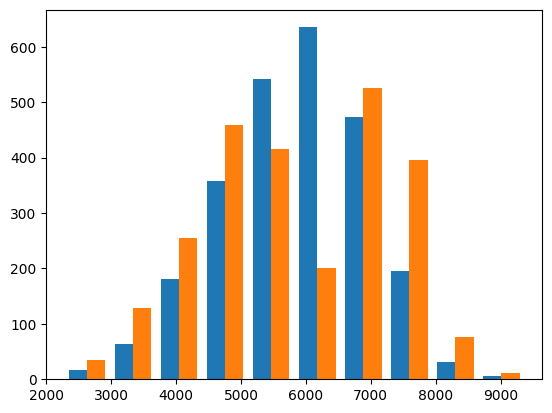

In [64]:
plt.hist(np.c_[np.asarray(train_size)[random_index],np.asarray(train_size)[bal_index]])


(array([[ 13.,  29.,  70., 137., 251., 355., 517., 660., 468.,   0.],
        [ 13.,  29.,  70., 137., 251., 318., 420., 528., 459., 275.]]),
 array([2274. , 2691.9, 3109.8, 3527.7, 3945.6, 4363.5, 4781.4, 5199.3,
        5617.2, 6035.1, 6453. ]),
 <a list of 2 BarContainer objects>)

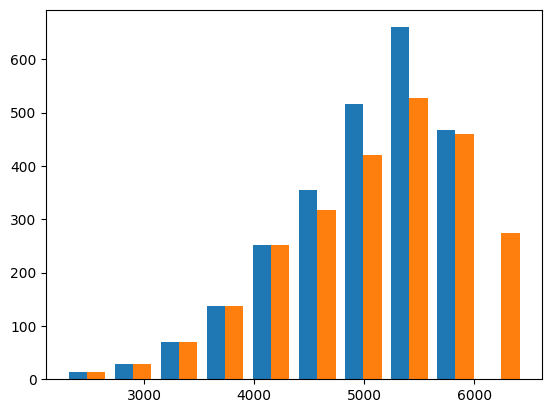

In [65]:
plt.hist(np.c_[np.asarray(train_size)[lo_unb_index],np.asarray(train_size)[lo_index]])
#_=plt.hist(np.asarray(train_size)[hi_unb_index])
#_=plt.hist(np.asarray(train_size)[hi_index])

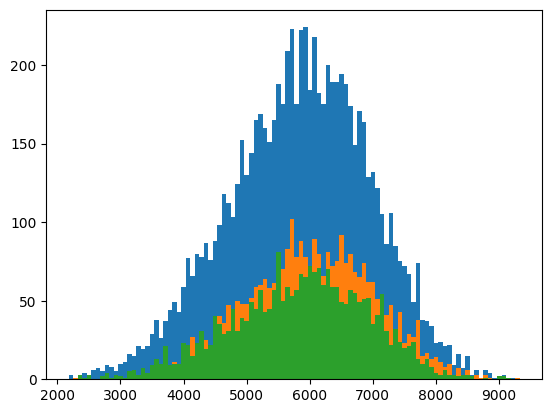

In [66]:
x=plt.hist(test_size,100)
_=plt.hist(np.asarray(test_size)[pred!=labels],x[1])
_=plt.hist(np.asarray(train_size)[random_index],x[1])
ran_pred = pred

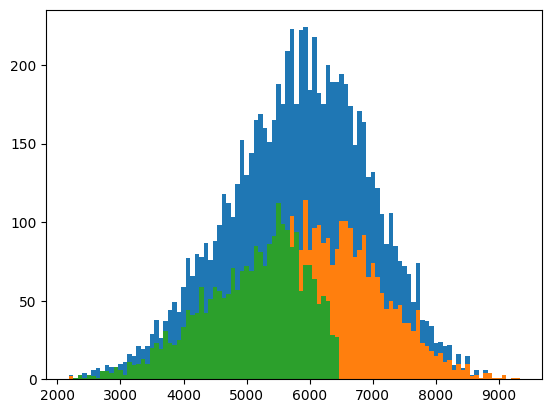

In [75]:
x=plt.hist(test_size,100)
_=plt.hist(np.asarray(test_size)[pred!=labels],x[1])
_=plt.hist(np.asarray(train_size)[lo_index],x[1])
lo_pred = pred

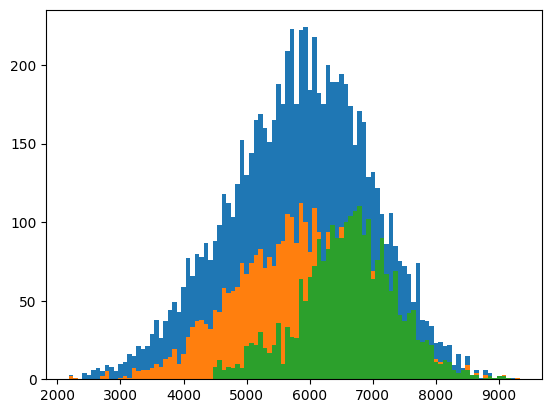

In [71]:
x=plt.hist(test_size,100)
_=plt.hist(np.asarray(test_size)[pred!=labels],x[1])
_=plt.hist(np.asarray(train_size)[hi_index],x[1])
hi_pred = pred

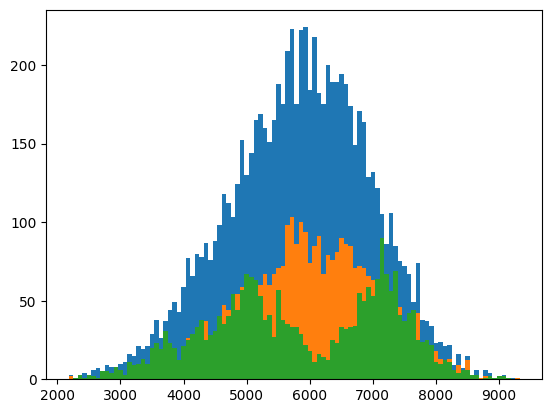

In [79]:
x=plt.hist(test_size,100)
_=plt.hist(np.asarray(test_size)[pred!=labels],x[1])
_=plt.hist(np.asarray(train_size)[bal_index],x[1])
bal_pred = pred

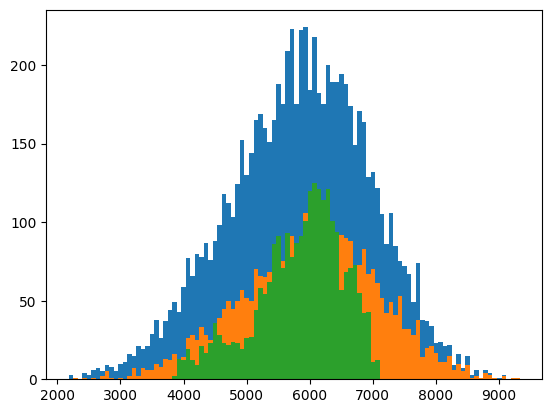

In [84]:
x=plt.hist(test_size,100)
_=plt.hist(np.asarray(test_size)[pred!=labels],x[1])
_=plt.hist(np.asarray(train_size)[bbal_index],x[1])
cbal_pred = pred

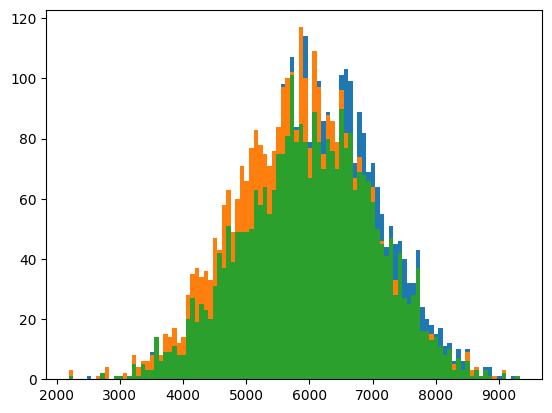

In [85]:

x=plt.hist(np.asarray(test_size)[lo_pred!=labels],100)
_=plt.hist(np.asarray(test_size)[hi_pred!=labels],x[1])
_=plt.hist(np.asarray(test_size)[ran_pred!=labels],x[1])

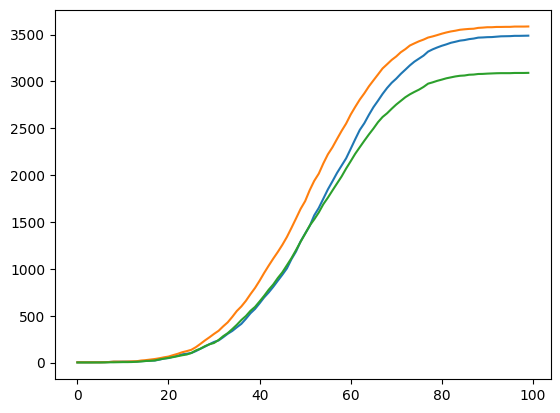

In [99]:
x=np.histogram(np.asarray(test_size)[lo_pred!=labels],100)
plt.plot(np.cumsum(x[0]))
x=np.histogram(np.asarray(test_size)[hi_pred!=labels],100)
plt.plot(np.cumsum(x[0]))
x=np.histogram(np.asarray(test_size)[ran_pred!=labels],100)
plt.plot(np.cumsum(x[0]))

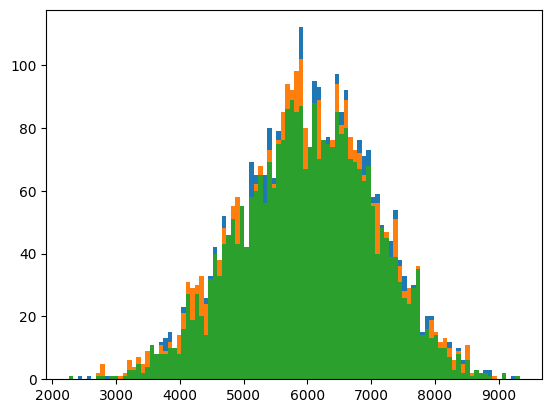

In [86]:
x=plt.hist(np.asarray(test_size)[cbal_pred!=labels],100)
_=plt.hist(np.asarray(test_size)[bal_pred!=labels],x[1])
_=plt.hist(np.asarray(test_size)[ran_pred!=labels],x[1])

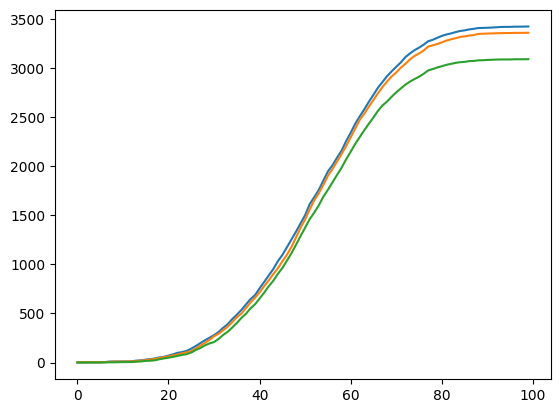

In [98]:
x=np.histogram(np.asarray(test_size)[cbal_pred!=labels],100)
plt.plot(np.cumsum(x[0]))
x=np.histogram(np.asarray(test_size)[bal_pred!=labels],100)
plt.plot(np.cumsum(x[0]))
x=np.histogram(np.asarray(test_size)[ran_pred!=labels],100)
plt.plot(np.cumsum(x[0]))

In [54]:
from sklearn.metrics import confusion_matrix

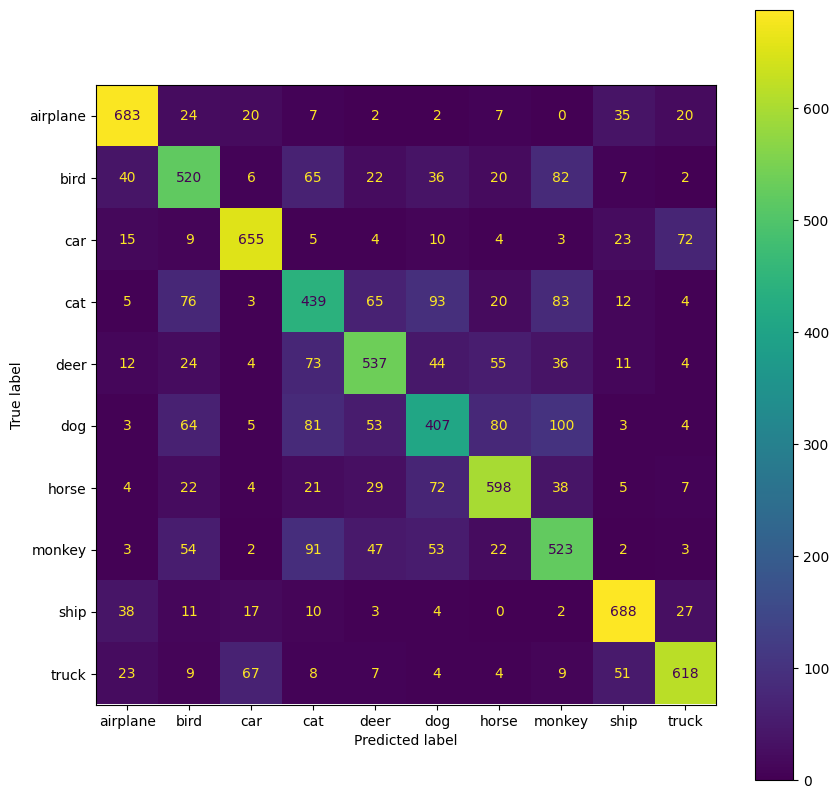

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(testset.labels,pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
#cmd.plot()
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

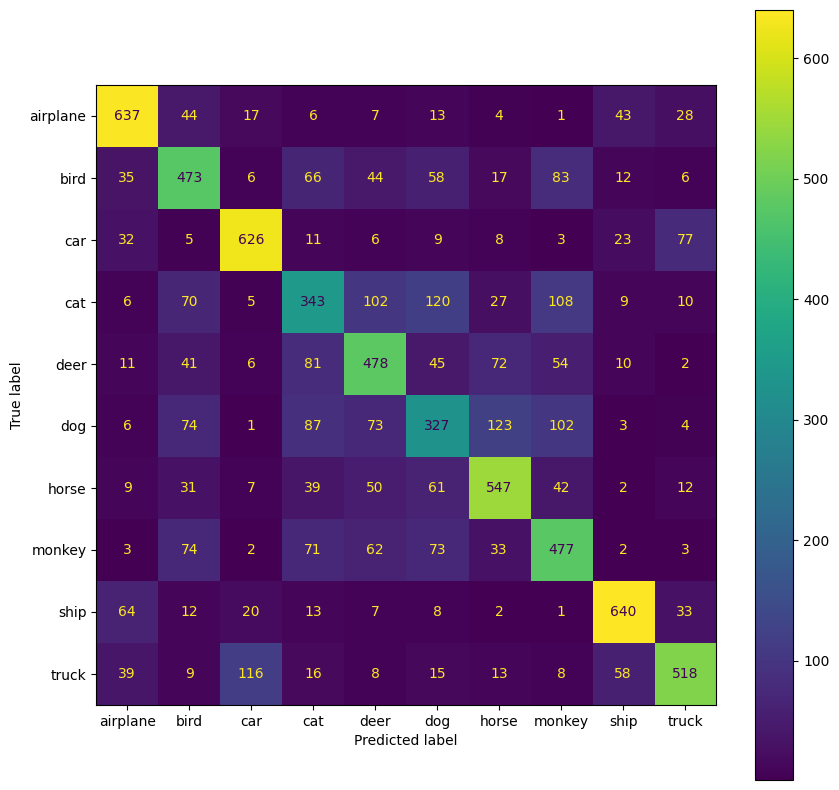

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(testset.labels,pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
#cmd.plot()
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

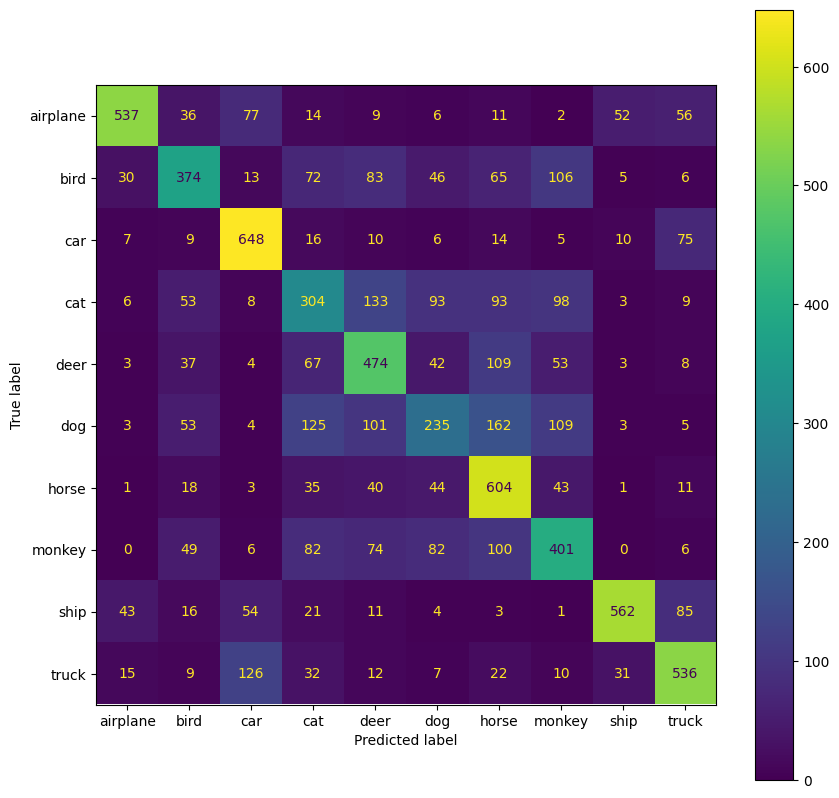

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(testset.labels,pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
#cmd.plot()
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

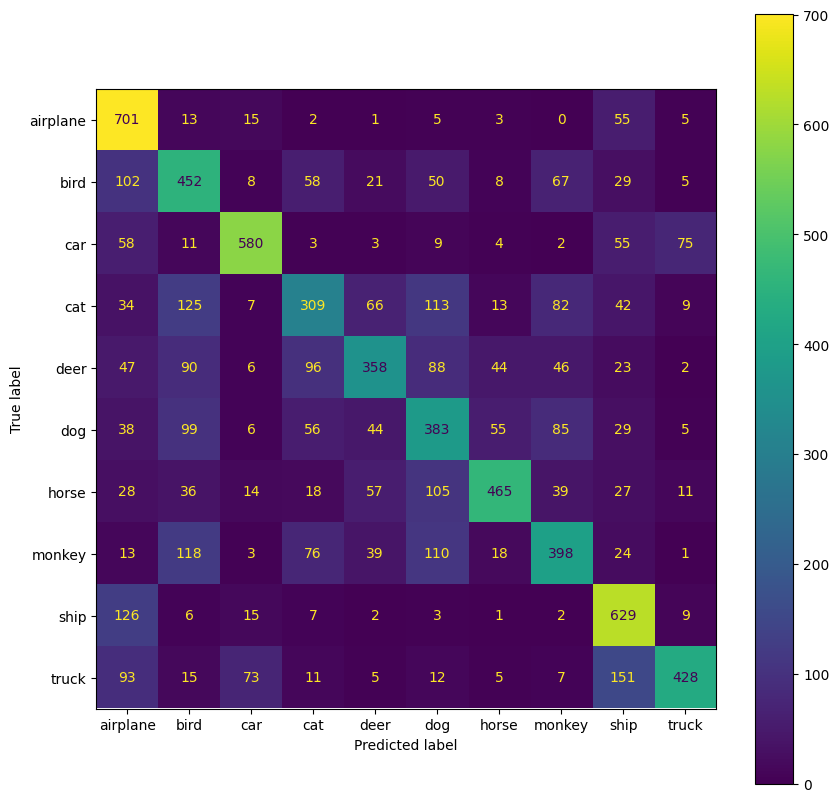

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(testset.labels,pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
#cmd.plot()
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)


In [82]:
ind = np.where(np.logical_and(np.asarray(testset.labels)==9,np.asarray(pred)==8))[0]
np.asarray(pred)[ind]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [83]:
everything = np.fromfile('data/stl10_binary/test_X.bin', dtype=np.uint8)
images = np.reshape(everything, (-1, 3, 96, 96)) #

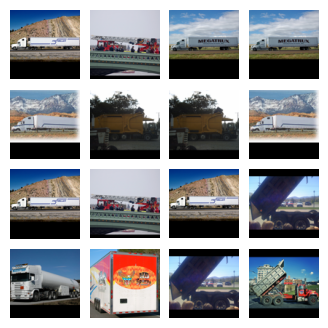

In [85]:
from mpl_toolkits.axes_grid1 import ImageGrid
ind = np.random.choice(ind,16)
fig = plt.figure(figsize=(4., 4.))

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


for ax, im in zip(grid, images[ind,:,:,]):
    # Iterating over the grid returns the Axes.
    ax.imshow(np.transpose(im,(2,1,0)))
    ax.axis('off')
plt.show()

In [56]:
classes = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']

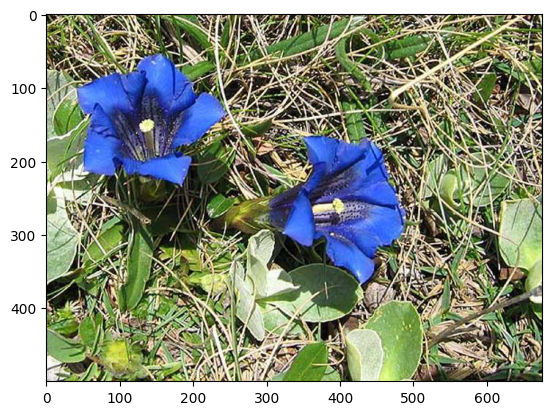

In [13]:
plt.imshow(plt.imread('data/flowers-102/jpg/image_05239.jpg'))

In [14]:
import scipy

In [26]:
labels = scipy.io.loadmat('data/flowers-102/imagelabels.mat')['labels']

In [18]:
ids = scipy.io.loadmat('data/flowers-102/setid.mat')

In [20]:
import os
import glob


In [21]:
files = glob.glob('data/flowers-102/jpg/*.jpg')

In [22]:
size = {}

for f in files:
    size[f] = os.path.getsize(f)

In [23]:
ids

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009',
 '__version__': '1.0',
 '__globals__': [],
 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16),
 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16),
 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}

In [24]:
ids['trnid']

array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16)

In [27]:
image_ids = ids['trnid'].tolist()


image_id_to_label = dict(enumerate((labels - 1).tolist(), 1))

In [29]:
image_id_to_label.keys()

dict_keys([1])

In [34]:
labels.max()

102

In [38]:
ids['trnid'].shape

(1, 1020)

In [39]:
labels.shape

(1, 8189)

In [48]:
from pathlib import Path

In [61]:
from scipy.io import loadmat

set_ids = loadmat('data/flowers-102/setid.mat', squeeze_me=True)
image_ids = set_ids['tstid'].tolist()

labels = loadmat('data/flowers-102/imagelabels.mat', squeeze_me=True)
image_id_to_label = dict(enumerate((labels["labels"] - 1).tolist(), 1))


In [62]:
tst_labels = []
tst_image_files = []
for image_id in image_ids:
    tst_labels.append(image_id_to_label[image_id])
    tst_image_files.append(Path('data/flowers-102/jpg')/ f"image_{image_id:05d}.jpg")

In [63]:
tst_image_files
np.unique(tst_labels,return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 array([ 20,  40,  20,  36,  45,  25,  20,  65,  26,  25,  67,  67,  29,
         28,  29,  21,  65,  62,  29,  36,  20,  39,  71,  22,  21,  21,
         20,  46,  58,  65,  32,  25,  26,  20,  23,  55,  88,  36,  21,
         47, 107,  39, 110,  73,  20, 176,  47,  51,  29,  72, 238,  65,
         73,  41,  51,  89,  47,  94,  47,  89,  30,  35,  34,  32,  82,
         41,  22,  34,  34,  42,  58,  76, 174, 151, 100,  

In [105]:
pwd

'/mnt/efs/Work'

In [6]:
cd pytorch-stl/

/mnt/efs/Work/pytorch-stl


In [7]:
from models import *

In [10]:
import torch
from torchvision.models.resnet import resnet50

In [12]:
    net = resnet50(num_classes=10)
    y = net(torch.randn(1, 3, 96, 96))
    print(y.size())

torch.Size([1, 10])
